<a href="https://colab.research.google.com/github/AlexBB999/THINK/blob/master/EXP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
homes= pd.read_csv("https://raw.githubusercontent.com/AlexBB999/Thinkful/master/homeprices.applied.econ.csv")

In [3]:
#homes.describe
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [4]:
print(list(homes))

['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']


In [0]:
#[homes['price'][i] if homes['airco']=='yes' for i in range(546)]

DO HOMES WITH AIR CONDITIONING HAVE A HIGHER SALES PRICE THAN HOMES WITHOUT AIR CONDITIONING?

ASSUMPTIONS:

Test variables continuous

No relationship between item

Independent smaples drawn at random

The test variable’s samples and populations are approximately normally distributed

Reasonably large enough samples (>30)

Variances are approximately equal in both the sample and population

HYPOTHESIS (null hypothesis)

Ho: u1-u2=0

there is no difference in sample mean

In [0]:
air=[]
no_air=[]
for i in range(546):
  if homes['airco'][i]=='yes': air.append(homes['price'][i])
  if homes['airco'][i]=='no': no_air.append(homes['price'][i])

In [6]:
len(air)

173

In [7]:
len(no_air)

373

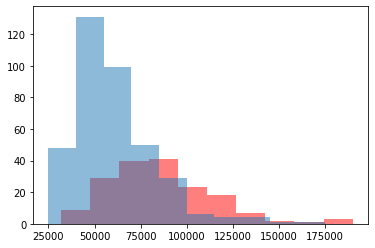

In [8]:
plt.hist(air, alpha = .5, color='r')
plt.hist(no_air, alpha = .5)
plt.show()

In [9]:
# skew and kurtosis
print(stats.describe(air))
print(' ')
print(stats.describe(no_air))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
 
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


SKEW AND KURTOSIS FOR AIR CONDITIONED HOMES WELL WITHIN VALUES FOR NORMALCY

FOR NO AIR VALUES ARE BORDERLINE



-1.5 to 1.5   FOR SKEW

-2.5 to 2.5    FOR KURTOSIS

In [10]:
stats.ttest_ind(air, no_air)

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

EXTREMELY SMALL PVALUE AND TVALUE==> REJECT NULL

In [0]:
air_array=np.asarray(air)
no_air_array=np.asarray(no_air)

COMPUTE CONFIDENCE INTERVAL

In [0]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


In [26]:
get_95_ci(no_air_array,air_array)

'The difference in means at the 95% confidence interval (two-tail) is between 21245.632939062376 and 30745.841157855302.'

POINTPLOT

[[Text(0, 0, 'air_yes'), Text(0, 0, 'air_no')]]

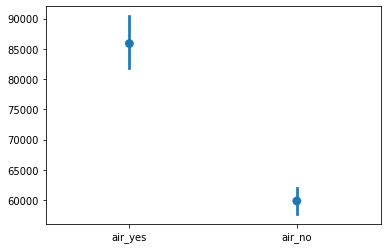

In [0]:
import seaborn as sns

g = sns.pointplot(data=[air,
                        no_air], join=False)
                        
g.set(xticklabels = ['air_yes', 'air_no'])

======================================================

======================================================

DO HOMES WITH BASEMENTSHAVE A HIGHER SALES PRICE THAN HOMES WITHOUT BASEMENTS?

In [0]:
base=[]
no_base=[]
for i in range(546):
  if homes['fullbase'][i]=='yes': base.append(homes['price'][i])
  if homes['fullbase'][i]=='no': no_base.append(homes['price'][i])

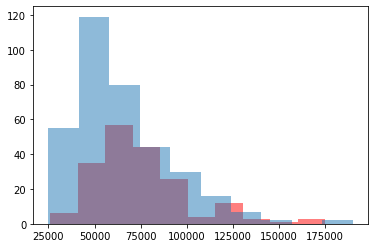

In [17]:
plt.hist(base, alpha = .5, color='r')
plt.hist(no_base, alpha = .5)
plt.show()

In [18]:
# skew and kurtosis
print(stats.describe(base))
print(' ')
print(stats.describe(no_base))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
 
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


In [19]:
stats.ttest_ind(base, no_base)

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [0]:
LARGE PVALUE ==> ACCEPT NULL HYPOTHESES -- THERE IS NO SIGNIFICANT DIFFERENCE

POINTPLOT

[[Text(0, 0, 'base_yes'), Text(0, 0, 'base_no')]]

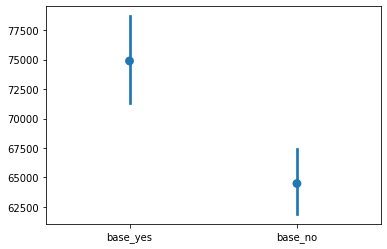

In [20]:
import seaborn as sns

g = sns.pointplot(data=[base,
                        no_base], join=False)
                        
g.set(xticklabels = ['base_yes', 'base_no'])

In [0]:
base_array=np.asarray(base)
no_base_array=np.asarray(no_base)

In [28]:
get_95_ci(no_base_array,base_array)

'The difference in means at the 95% confidence interval (two-tail) is between 5811.679067671446 and 15022.159970747538.'